<a href="https://colab.research.google.com/github/bptripp/ai-course/blob/main/heart_disease_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Decision Trees to Predict Heart Disease
Like any machine-learning tool, decision trees need real-world examples to learn from. The 63-year-old male described in the module was based on a real patient of the Cleveland Clinic, part of the Cleveland Heart Disease dataset (https://archive.ics.uci.edu/ml/datasets/Heart+Disease), a dataset used in early experiments with automatic diagnosis. This dataset contains information about 303 patients.

*Run the code cell below to download this dataset.*  


In [4]:
!wget https://raw.githubusercontent.com/bptripp/ai-course/main/heart.csv

--2023-09-04 01:32:45--  https://raw.githubusercontent.com/bptripp/ai-course/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11410 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.14K  --.-KB/s    in 0s      

2023-09-04 01:32:45 (104 MB/s) - ‘heart.csv’ saved [11410/11410]



You now have the dataset in a comma-separated value (CSV) file on this Google Colab server. You can see this file by clicking the folder icon at the left of the page. The next step is to open the file and read the data into the memory.  

*Run the code below to read the data into memory. This code also prints the first few data records.*

In [5]:
# With the first line of code below, we import "pandas", a popular package
# of software functions that is useful for data processing. If you are curious,
# you can learn more about pandas here: https://pandas.pydata.org/
import pandas as pd

data = pd.read_csv('heart.csv') # this line uses pandas to read data from the file
data.head() # this line prints the first few data records

,age,sex,pain_type,resting_bp,serum_chol,fasting_blood_sugar,rest_ecg,max_hr_thalach,exercise_angina,st_depression_ex_vs_rest,st_slope,vessels_coloured,defect,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The first 13 columns of data are patient demographics and results of non-invasive tests, which we will use for prediction. The final column gives the actual result of an angiogram (1 if there is >50% luminal narrowing of any major epicardial vessel, or 0 otherwise). You will use these examples to create a decision tree that predicts coronary artery disease (the last column) given the information in the other columns.

In fact, you need this dataset for two different and complementary purposes. You will use some of the examples in the dataset to train the decision tree. This will set the tree's parameters so that it makes predictions that are as consistent as possible with these examples. However, as you learned in Module 03, you must also withhold some of the data for a validation set, so that you can check how well the tree generalizes to examples that it didn't encounter during training. This will give you some indication of how it might perform with new examples in the real world.

*Run the code below to split the dataset into two groups of examples: a larger group for training and a smaller group for testing.*

In [7]:
# This code imports a function from the scikit-learn package
# (https://scikit-learn.org/stable/).
from sklearn.model_selection import train_test_split

predictors = data.iloc[:, 0:13] # this puts the columns that will serve as inputs in a new variable
ground_truth = data.iloc[:, -1] # the last column is "ground truth" CAD from the angiogram

# Scikit-learn provides a function that splits the data so that we
# can use some of it to train the decision tree and the rest to test it.
# To avoid long variable names, this code uses the short form "p" for predictors
# and "gt" for ground truth.
training_p, testing_p, training_gt, testing_gt = train_test_split(predictors, ground_truth, test_size = 0.20, random_state = 0)

You are now ready to train the decision tree, using the predictor columns of the examples you are using for training (the p_train variable) and the correct diagnoses for those examples (the gt_train variable).

*Run the code below to train the decision tree on the training data.*

In [10]:
# This imports decision-tree code from scikit-learn.
from sklearn.tree import DecisionTreeClassifier

# To keep the tree simple and interpretable, the argument max_depth=2 limits the
# length of each branch to two decisions.
dt = DecisionTreeClassifier(max_depth=2)

# The variable "dt" is now an untrained decision tree. This line trains it on the
# training data.
dt.fit(training_p, training_gt)



DecisionTreeClassifier(max_depth=2)

*Run the cell below to get the decision tree to generate predictions for the examples in the held-out test dataset.*

In [11]:
predictions = dt.predict(testing_p)

The suspense is killing you. How accurate were the predictions you just generated? One useful way to assess that is to view a "confusion matrix". This shows how many of the test examples fell into each of four possible categories: heart disease that was accurately predicted as such, lack of heart disease that was accurately predicted as such, and errors in each direction.

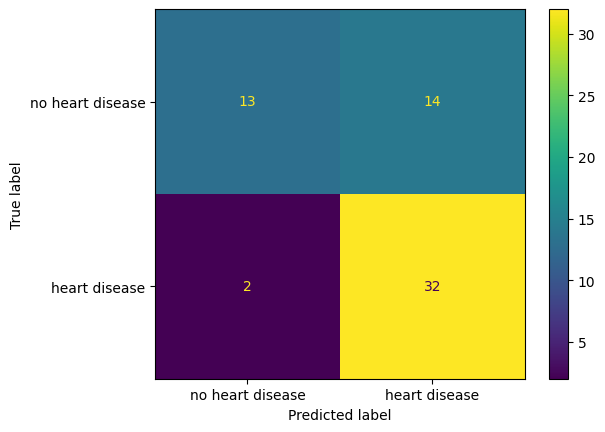

In [12]:
from sklearn import metrics # using scikit-learn again

# This line counts the numbers of test examples in each correct and incorrect category.
confusion_matrix = metrics.confusion_matrix(testing_gt, predictions)

# These two lines show the result graphically.
display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=['no heart disease','heart disease'])
display.plot()

The decision tree does a relatively good job of predicting heart disease in patients who actually have it. However, the false negatives are dangerous. It may be possible to make the tree more accurate by making it larger and/or using a larger dataset with more examples. To more specifically reduce the risk of false negatives, one could also reduce the threshold for a positive prediction. This would increase the number false positives (increasing resource usage) but reduce the false negatives (reducing the risk of missing something important).

An advantage of decision trees over more complex machine-learning approaches is that one can inspect them to see how they make decisions. This is especially practical in the current example because the tree has been constrained to have a depth of two - a very simple structure.

*Run the code below to show a depiction of the decision tree's structure.*

[Text(0.5, 0.8333333333333334, 'pain_type <= 0.5\nsamples = 242\nvalue = [111, 131]\nclass = Heart disease'),
 Text(0.25, 0.5, 'vessels_coloured <= 0.5\nsamples = 117\nvalue = [84, 33]\nclass = None'),
 Text(0.125, 0.16666666666666666, 'samples = 54\nvalue = [24, 30]\nclass = Heart disease'),
 Text(0.375, 0.16666666666666666, 'samples = 63\nvalue = [60, 3]\nclass = None'),
 Text(0.75, 0.5, 'sex <= 0.5\nsamples = 125\nvalue = [27, 98]\nclass = Heart disease'),
 Text(0.625, 0.16666666666666666, 'samples = 47\nvalue = [1, 46]\nclass = Heart disease'),
 Text(0.875, 0.16666666666666666, 'samples = 78\nvalue = [26, 52]\nclass = Heart disease')]

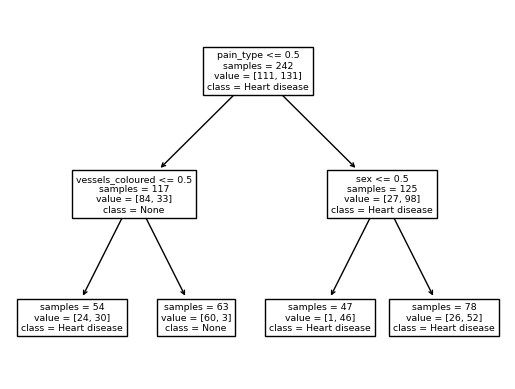

In [13]:
from sklearn.tree import plot_tree

plot_tree(dt, class_names=('None', 'Heart disease'), feature_names=list(predictors), impurity=False)

The arrows coming from each box indicate alternate decisions based on the value of a predictor.

Look at the top box first. The top line of text in this box describes the first decision the tree makes: if the patient's angina code is 0 (no angina) the tree takes the left branch. The second line shows the number of examples at that point in the tree (the 242 training examples). The third gives the numbers in each category (111 without heart disease and 131 with). The fourth shows the majority category at that point in the tree.

By inspecting this decision tree you can see exactly how it has learned to make predictions. Unfortunately, there tends to be a trade-off between classifiers' scrutability and their performance. Later in this module, you will learn about variations of decision trees that tend to be more accurate but also more opaque.